In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [24]:
#@title
url = 'https://raw.githubusercontent.com/costalferz/Football-Club-MarketValue_EDA/main/club.csv'
data = pd.read_csv(url)
data

,Unnamed: 0,Club Name,Competition Name,Squad Size,Average Age Of Players,Market Value Of Club In Millions(£),Average Market Value Of Players In Millions(£),Market Value Of Top 18 Players In Millions(£)
0,0,Manchester City,Premier League,24,27.1,970.02,40.42,920.70
1,1,Paris Saint-Germain,Ligue 1,36,26.1,891.18,24.76,801.00
2,2,Manchester United,Premier League,29,27.9,820.13,28.28,742.50
3,3,Chelsea FC,Premier League,27,26.9,802.35,29.72,737.10
4,4,Liverpool FC,Premier League,27,27.2,779.85,28.88,715.95
...,...,...,...,...,...,...,...,...
95,95,Levante UD,LaLiga,27,28.1,89.19,3.30,82.35
96,96,FC Metz,Ligue 1,29,25.3,89.19,3.08,79.74
97,97,Clube Atlético Mineiro,Série A,29,27.5,88.61,3.06,76.46
98,98,Lokomotiv Moscow,Premier Liga,29,25.0,87.32,3.01,77.85


In [25]:
#@title
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      100 non-null    int64  
 1   Club Name                                       100 non-null    object 
 2   Competition Name                                100 non-null    object 
 3   Squad Size                                      100 non-null    int64  
 4   Average Age Of Players                          100 non-null    float64
 5   Market Value Of Club In Millions(£)             100 non-null    float64
 6   Average Market Value Of Players In Millions(£)  100 non-null    float64
 7   Market Value Of Top 18 Players In Millions(£)   100 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 6.4+ KB


In [26]:
#@title
data.isnull().sum()

Unnamed: 0                                        0
Club Name                                         0
Competition Name                                  0
Squad Size                                        0
Average Age Of Players                            0
Market Value Of Club In Millions(£)               0
Average Market Value Of Players In Millions(£)    0
Market Value Of Top 18 Players In Millions(£)     0
dtype: int64

In [27]:
#@title
data = data.drop(['Unnamed: 0'],axis=1)
data

,Club Name,Competition Name,Squad Size,Average Age Of Players,Market Value Of Club In Millions(£),Average Market Value Of Players In Millions(£),Market Value Of Top 18 Players In Millions(£)
0,Manchester City,Premier League,24,27.1,970.02,40.42,920.70
1,Paris Saint-Germain,Ligue 1,36,26.1,891.18,24.76,801.00
2,Manchester United,Premier League,29,27.9,820.13,28.28,742.50
3,Chelsea FC,Premier League,27,26.9,802.35,29.72,737.10
4,Liverpool FC,Premier League,27,27.2,779.85,28.88,715.95
...,...,...,...,...,...,...,...
95,Levante UD,LaLiga,27,28.1,89.19,3.30,82.35
96,FC Metz,Ligue 1,29,25.3,89.19,3.08,79.74
97,Clube Atlético Mineiro,Série A,29,27.5,88.61,3.06,76.46
98,Lokomotiv Moscow,Premier Liga,29,25.0,87.32,3.01,77.85


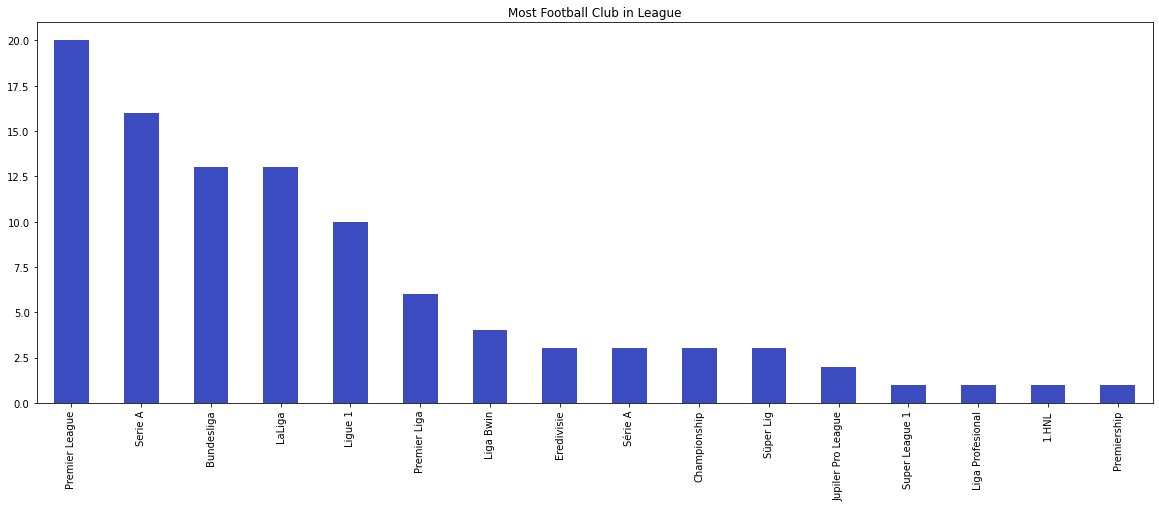

In [28]:
#@title
Competition = data['Competition Name'].value_counts()
plt.figure(figsize=(20,7))
plot = Competition.plot.bar(cmap ='coolwarm')
plt.title('Most Football Club in League')
plt.show()

In [29]:
#@title
ls = data['Competition Name'].value_counts().index.to_list()
ls1 = data['Competition Name'].value_counts().values
temp = []
temp1= []
for i in range(len(ls)):
    temp.append(ls[i])
    temp1.append(ls1[i])
dict = {'Competition Name' : temp, 'Count' : ls1}
df1 = pd.DataFrame(dict)

temp = data.groupby('Competition Name').mean()
ls = temp['Squad Size'].index.to_list()
squad = temp['Squad Size'].values
avg_age = temp['Average Age Of Players'].values
club_val = temp['Market Value Of Club In Millions(£)'].values
mv = temp['Average Market Value Of Players In Millions(£)'].values
mv18 = temp['Market Value Of Top 18 Players In Millions(£)'].values
temp = []
temp1= []
temp2 = []
temp3= []
temp4 = []
temp5 = []
for i in range(len(ls)):
    temp.append(ls[i])
    temp1.append(squad[i])
    temp2.append(avg_age[i])
    temp3.append(club_val[i])
    temp4.append(mv[i])
    temp5.append(mv18[i])
dict1 = {'Competition Name' : temp, 'Avg Squad Size' : temp1, 'Avg Age Of Players':temp2,'Avg Market Value Of ClubsIn Millions(£)' : temp3, 'Avg Market Value Of Players In Millions(£)':temp4, 'Avg Market Value Of Top 18 Players In Millions(£)':temp5}
df2 = pd.DataFrame(dict1)
df2

,Competition Name,Avg Squad Size,Avg Age Of Players,Avg Market Value Of ClubsIn Millions(£),Avg Market Value Of Players In Millions(£),Avg Market Value Of Top 18 Players In Millions(£)
0,1.HNL,30.000000,26.100000,98.820000,3.290000,89.460000
1,Bundesliga,29.538462,25.053846,275.491538,9.433846,254.447692
2,Championship,28.000000,26.800000,116.463333,4.146667,107.040000
3,Eredivisie,26.666667,24.833333,181.306667,6.973333,169.170000
4,Jupiler Pro League,27.500000,23.800000,135.475000,4.915000,124.470000
5,LaLiga,25.923077,27.369231,309.800769,11.986154,287.640000
6,Liga Bwin,27.000000,26.225000,194.447500,7.210000,175.050000
7,Liga Profesional,29.000000,27.900000,100.040000,3.450000,93.170000
8,Ligue 1,28.800000,24.840000,264.633000,8.771000,242.568000
9,Premier League,26.100000,26.865000,408.561000,15.731500,378.175500


In [38]:
#@title
fig = px.bar(df1, y= 'Count' ,x = 'Competition Name', color= 'Competition Name')
fig.update_layout(showlegend=False)
fig.show()

In [31]:
#@title
fig = px.bar(df2, y= 'Avg Squad Size' ,x = 'Competition Name', color= 'Competition Name')
fig.update_layout(showlegend=False)
fig.show()

In [32]:
#@title
fig = px.bar(df2, y= df2['Avg Market Value Of ClubsIn Millions(£)'] ,x = 'Competition Name', color= 'Competition Name')
fig.update_layout(showlegend=False)
fig.show()

In [33]:
#@title
fig = px.bar(df2[0:20], y= 'Avg Age Of Players' ,x = 'Competition Name', color= 'Competition Name')
fig.update_layout(showlegend=False)
fig.show()

In [34]:
#@title
fig = px.bar(data[0:20], y='Market Value Of Club In Millions(£)' ,x = 'Club Name', color= 'Club Name')
fig.update_layout(showlegend=False)
fig.show()

In [35]:
#@title
fig = px.bar(data[:25], y= 'Squad Size' ,x = 'Club Name', color= 'Club Name')
fig.update_layout(showlegend=False)
fig.show()